# **Business Analysis**

- **Objective**: Predict product sales (`Sales`) using advertising expenditures (`TV, Radio, Newspaper`).

- **Business Value**: Optimize ad spend across platforms, maximize sales ROI, and support marketing strategy.

- **Type of ML Problem**: **Supervised regression** (continuous target variable).

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('advertising_sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# **Exploratory Data Analysis**

In [6]:
df.shape

(200, 4)

In [7]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


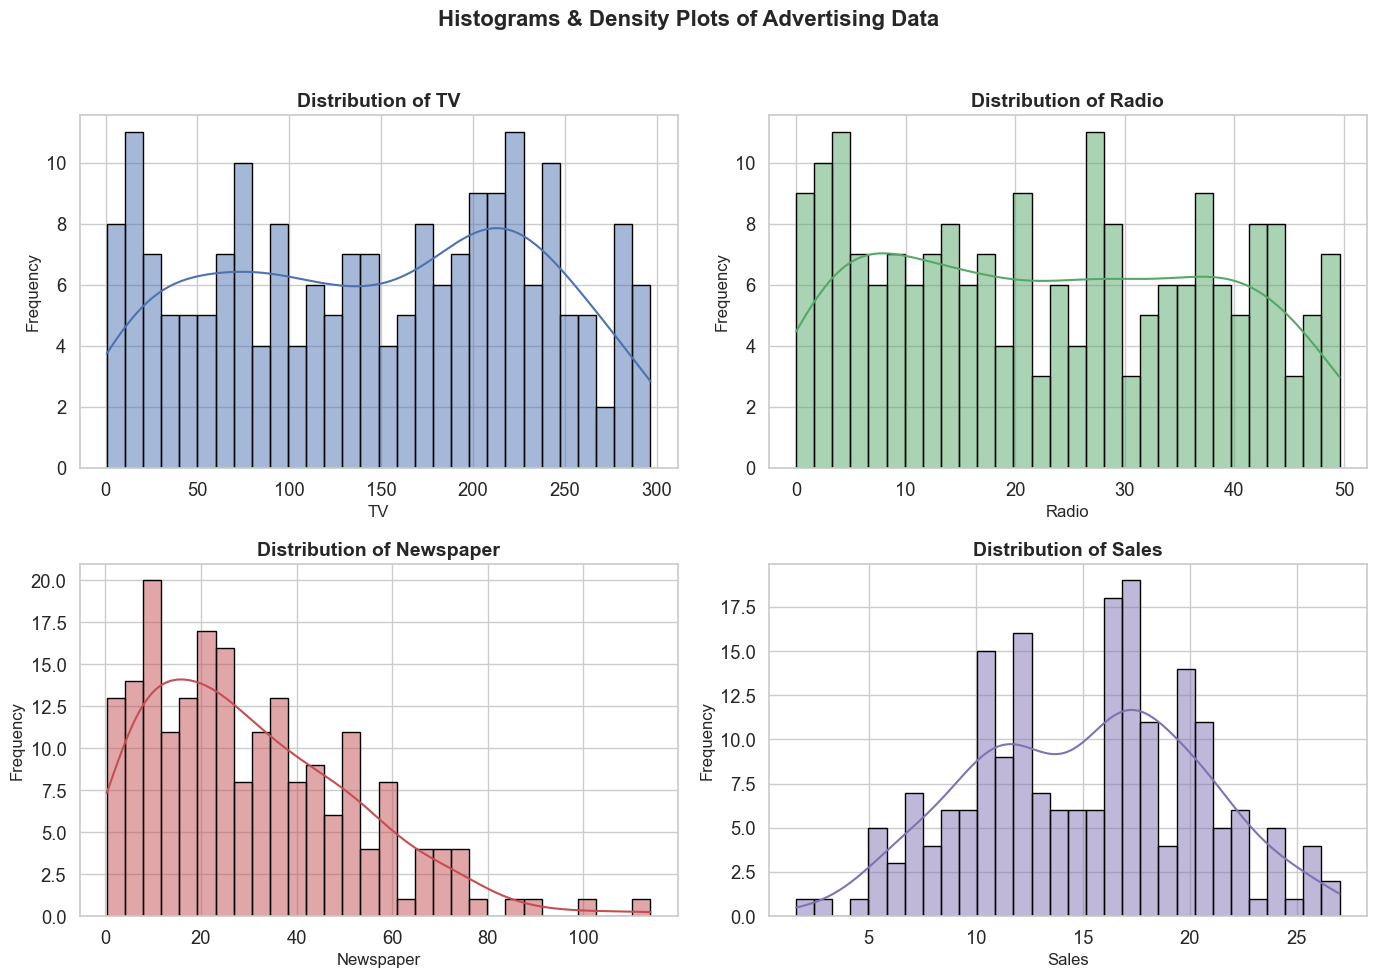

In [11]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

columns = ["TV", "Radio", "Newspaper", "Sales"]
colors = ["#4C72B0", "#55A868", "#C44E52", "#8172B2"]

for col, ax, color in zip(columns, axes.flat, colors):
    sns.histplot(
        df[col], kde=True, bins=30,
        color=color, ax=ax,
        edgecolor="black")
    ax.set_title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

plt.suptitle("Histograms & Density Plots of Advertising Data",
             fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

- **TV Advertising**
  - Range: ~0 to 300
  - Distribution: Fairly uniform
  - Insight: Consistent budget allocation.

- **Radio Advertising**
  - Range: ~0 to 50
  - Distribution: Balanced with some peaks
  - Insight: Varied but evenly spread investments.

- **Newspaper Advertising**
  - Range: ~0 to 115
  - Distribution: Right-skewed
  - Insight: Majority spend is low, possibly due to reduced effectiveness.

- **Sales**
  - Range: ~1 to 27
  - Distribution: Slightly bimodal
  - Insight: Indicates potential segmentation in performance.

---

## Key Takeaways

- TV and Radio have balanced budget strategies.
- Newspaper shows low and skewed investment patterns.
- Sales distribution suggests different performance clusters.

In [13]:
outlier_summary = {}

for col in ["TV", "Radio", "Newspaper", "Sales"]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    outlier_summary[col] = {
        "num_outliers": len(outliers),
        "lower_bound": round(lower_bound, 2),
        "upper_bound": round(upper_bound, 2)
    }

print(" Outlier Summary (IQR Method):")
for col, vals in outlier_summary.items():
    print(f"{col}: {vals}")

 Outlier Summary (IQR Method):
TV: {'num_outliers': 0, 'lower_bound': -142.3, 'upper_bound': 435.5}
Radio: {'num_outliers': 0, 'lower_bound': -29.85, 'upper_bound': 76.35}
Newspaper: {'num_outliers': 2, 'lower_bound': -35.78, 'upper_bound': 93.62}
Sales: {'num_outliers': 0, 'lower_bound': -1.08, 'upper_bound': 31.12}


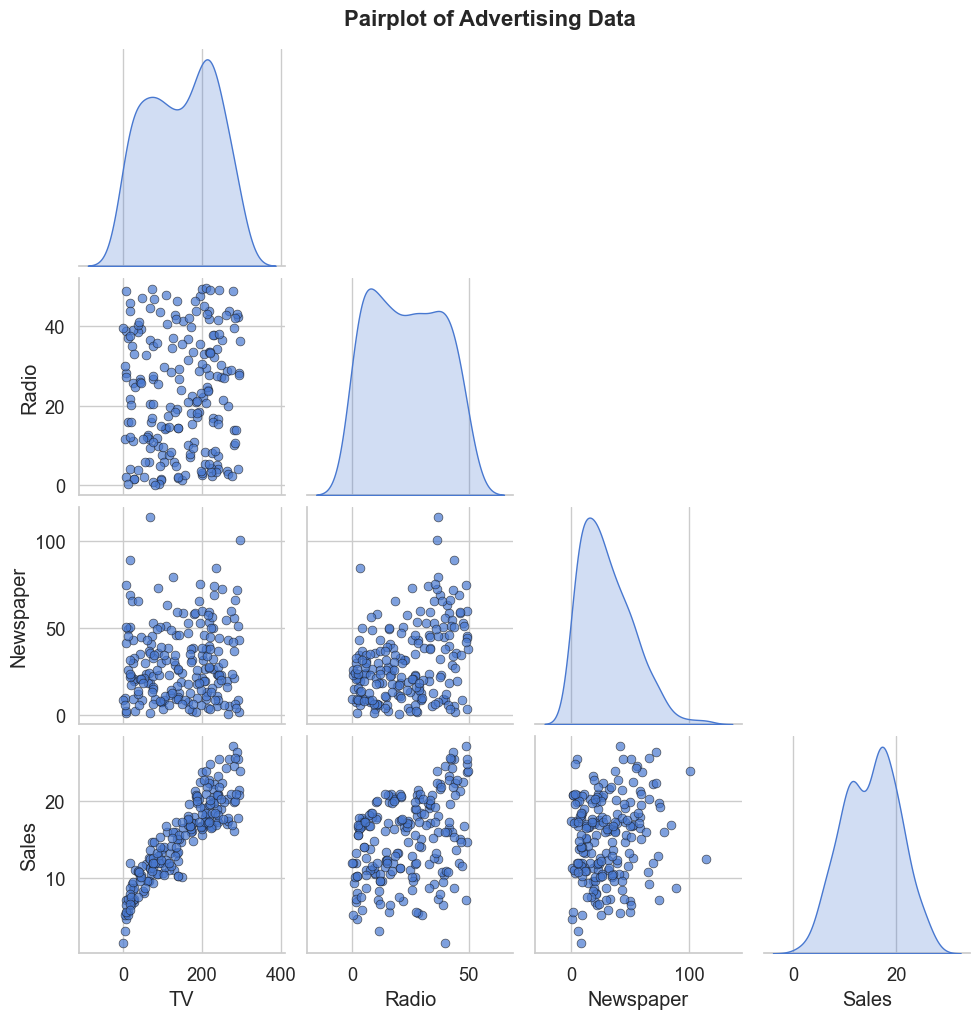

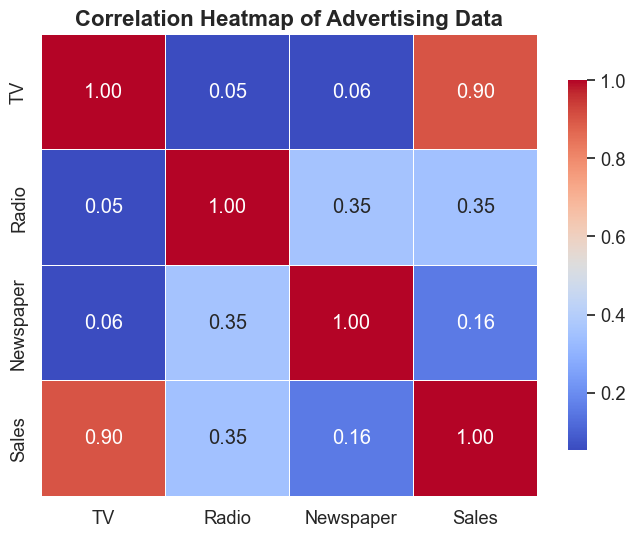

In [14]:
# Pairplot
sns.set(style="whitegrid", palette="muted", font_scale=1.2)
sns.pairplot(df, diag_kind="kde", corner=True,
             plot_kws={'alpha':0.7, 's':40, 'edgecolor':'k'})
plt.suptitle("Pairplot of Advertising Data", fontsize=16, fontweight="bold", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f",
            linewidths=0.5, cbar_kws={"shrink": .8})

plt.title("Correlation Heatmap of Advertising Data", fontsize=16, fontweight="bold")
plt.show()

### 1. **Pairplot Analysis**
- **TV vs Sales**: Strong positive correlation observed. As TV advertising increases, sales tend to rise significantly.
- **Radio vs Sales**: Moderate positive correlation. Some upward trend is visible but with more scatter compared to TV.
- **Newspaper vs Sales**: Weak or no visible correlation. Points appear scattered with no clear trend.

### 2. *Distribution Insights*
- **TV and Sales** distributions show clear peaks, indicating concentration of data around certain spending and sales values.
- **Newspaper** has a wider spread, suggesting inconsistent advertising spend.
- **Radio** has a bimodal-like distribution, possibly indicating segmented marketing strategies.

### 3. *Correlation Heatmap Insights*
| Variable     | Correlation with Sales |
|--------------|------------------------|
| **TV**       | **0.90** (Strong positive) |
| **Radio**    | **0.35** (Moderate positive) |
| **Newspaper**| **0.16** (Weak positive) |

- *TV advertising* is the most influential factor for predicting sales.
- *Radio* has a moderate influence and could be useful when combined with TV.
- *Newspaper* has minimal impact and may not be a valuable predictor.

### Conclusion
TV advertising is the most effective channel for driving sales, followed by Radio. Newspaper ads show minimal effectiveness and may not be worth further investment from a predictive modeling perspective.

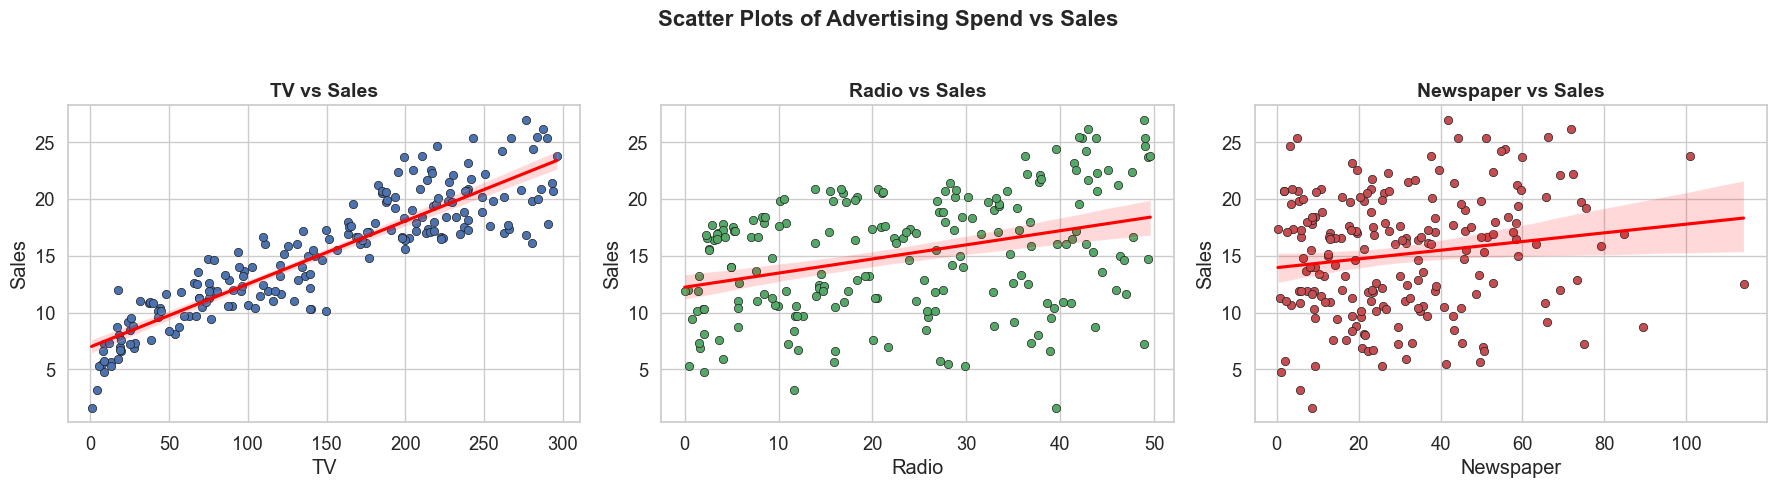

In [16]:
sns.set(style="whitegrid", palette="muted", font_scale=1.2)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Scatter plots with regression line for clarity
sns.scatterplot(x="TV", y="Sales", data=df, ax=axes[0], color="#4C72B0", edgecolor="k")
sns.regplot(x="TV", y="Sales", data=df, ax=axes[0], scatter=False, color="red")
axes[0].set_title("TV vs Sales", fontsize=14, fontweight="bold")

sns.scatterplot(x="Radio", y="Sales", data=df, ax=axes[1], color="#55A868", edgecolor="k")
sns.regplot(x="Radio", y="Sales", data=df, ax=axes[1], scatter=False, color="red")
axes[1].set_title("Radio vs Sales", fontsize=14, fontweight="bold")

sns.scatterplot(x="Newspaper", y="Sales", data=df, ax=axes[2], color="#C44E52", edgecolor="k")
sns.regplot(x="Newspaper", y="Sales", data=df, ax=axes[2], scatter=False, color="red")
axes[2].set_title("Newspaper vs Sales", fontsize=14, fontweight="bold")

plt.suptitle("Scatter Plots of Advertising Spend vs Sales", fontsize=16, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Scatter Plot Insights

### TV vs Sales
- Strong **positive linear relationship**.
- Clear upward trend—**higher TV spend correlates with higher sales**.

### Radio vs Sales
- Mild positive trend with more dispersion.
- Suggests **some influence**, but less consistent than TV.

### Newspaper vs Sales
- **Weak and scattered relationship**.
- Indicates that **newspaper spend has little to no consistent effect on sales**.

---

In [18]:
import statsmodels.api as sm

print("Correlation with Sales:")
print(df.corr()["Sales"].sort_values(ascending=False), "\n")

# Multiple Linear Regression (OLS)
X = df[["TV", "Radio", "Newspaper"]]   
y = df["Sales"]                        

X_const = sm.add_constant(X)

model = sm.OLS(y, X_const).fit()

print(model.summary())

Correlation with Sales:
Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Mon, 06 Oct 2025   Prob (F-statistic):           8.13e-99
Time:                        19:57:42   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025  

**TV has the strongest correlation with Sales, indicating it plays the most significant role in influencing customer purchases**.

### Regression Model Summary

- **R² = 0.903** → The model explains **about 90% of the variance** in sales — an excellent fit.
- **F-statistic = 605.4, p < 0.001** → Model is **statistically significant** overall.
- **Durbin–Watson = 2.25** → No major autocorrelation issues.

### Key Findings

- **TV and Radio** are statistically significant predictors of Sales.
- **Newspaper advertising has no significant contribution** (p = 0.954).
- Model is robust, with high explanatory power (R² ≈ 0.90).
- There’s no evidence of **autocorrelation** or multicollinearity issues.

# **Data Preprocessing**

In [21]:
df.loc[df.Newspaper>93.62]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


# **Feature Engineering**

In [23]:
# Calculate total ad spend
df["Total_Spend"] = df["TV"] + df["Radio"] + df["Newspaper"]

df["TV_share"] = df["TV"] / df["Total_Spend"]
df["Radio_share"] = df["Radio"] / df["Total_Spend"]
df["Newspaper_share"] = df["Newspaper"] / df["Total_Spend"]

df[["TV_share", "Radio_share", "Newspaper_share"]] = df[["TV_share", "Radio_share", "Newspaper_share"]].fillna(0)

print(df[["TV_share", "Radio_share", "Newspaper_share"]].head())

   TV_share  Radio_share  Newspaper_share
0  0.682587     0.112133         0.205280
1  0.345229     0.304888         0.349884
2  0.129909     0.346677         0.523414
3  0.602865     0.164345         0.232789
4  0.723200     0.043200         0.233600


# **Model Building**

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

X = df[["TV", "Radio", "Newspaper"]]   
y = df["Sales"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "Decision Tree": DecisionTreeRegressor(max_depth=5, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42),}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    results.append([name, r2, rmse, mae])

results_df = pd.DataFrame(results, columns=["Model", "R2", "RMSE", "MAE"])
print(results_df.sort_values(by="RMSE"))

               Model        R2      RMSE       MAE
5  Gradient Boosting  0.958663  1.130196  0.847579
4      Random Forest  0.954722  1.182847  0.914075
0  Linear Regression  0.905901  1.705215  1.274826
1              Ridge  0.905900  1.705226  1.274830
2              Lasso  0.905851  1.705674  1.274175
3      Decision Tree  0.900143  1.756611  1.200093


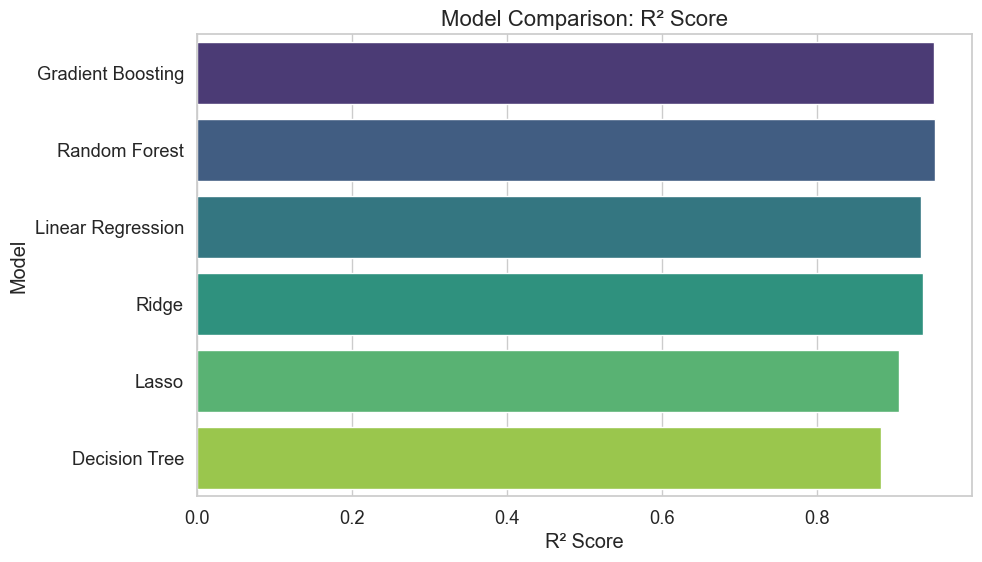

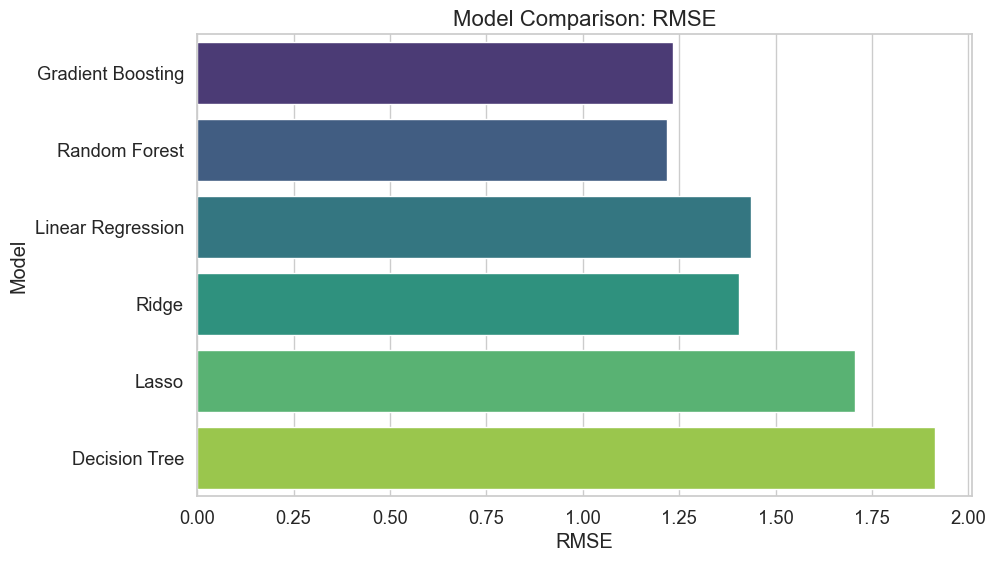

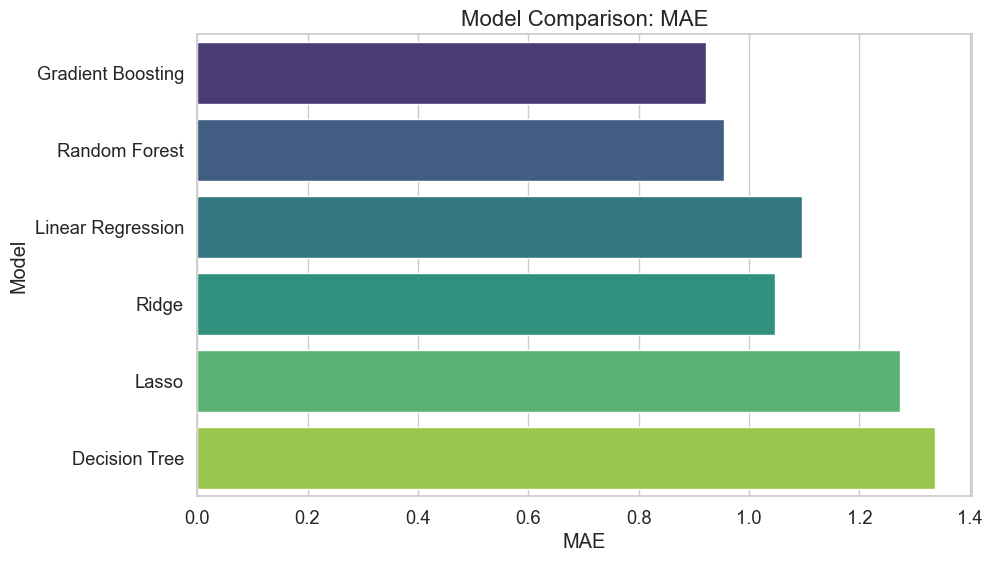

In [26]:
results = {
    "Model": ["Gradient Boosting", "Random Forest", "Linear Regression", "Ridge", "Lasso", "Decision Tree"],
    "R2": [0.950739, 0.951925, 0.933207, 0.936041, 0.905851, 0.881445],
    "RMSE": [1.233778, 1.218843, 1.436655, 1.405842, 1.705674, 1.914024],
    "MAE": [0.922060, 0.954175, 1.095228, 1.047263, 1.274175, 1.337236]}

results_df = pd.DataFrame(results)

# Visualization
sns.set(style="whitegrid", font_scale=1.2)
palette = sns.color_palette("viridis", len(results_df))

# Function to plot comparison
def plot_metric(metric, title, xlabel):
    plt.figure(figsize=(10,6))
    sns.barplot(x=metric, y="Model", data=results_df, palette=palette)
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel)
    plt.ylabel("Model")
    plt.show()

# Plot comparisons
plot_metric("R2", "Model Comparison: R² Score", "R² Score")
plot_metric("RMSE", "Model Comparison: RMSE", "RMSE")
plot_metric("MAE", "Model Comparison: MAE", "MAE")

## Key Insights

- **Best Model**: Gradient Boosting delivers the highest accuracy (R² = 0.95) with the lowest errors (RMSE = 1.13, MAE = 0.85).

- **Runner-Up**: Random Forest performs strongly but is slightly less accurate.

- **Linear Models**: (OLS, Ridge, Lasso) show similar performance (R² ≈ 0.906), useful for interpretability rather than raw accuracy.

- **Decision Tree**: Lowest performance, prone to overfitting compared to ensembles.

**Final Choice: Gradient Boosting** is the best overall model.

# **Model Interpretation**

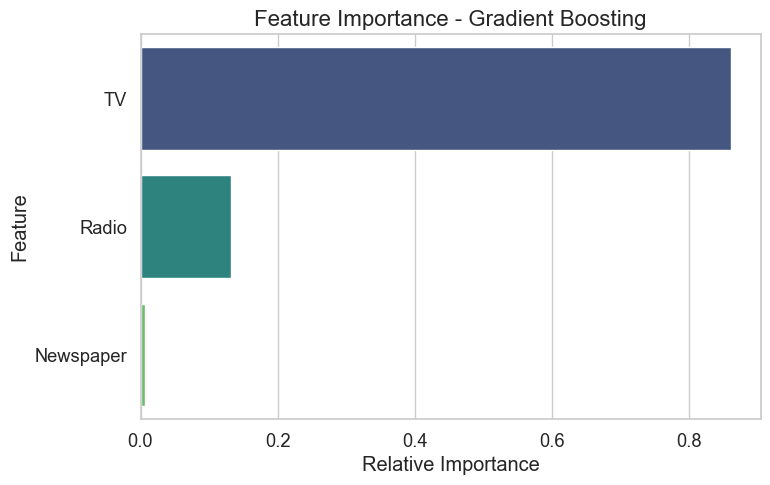

In [29]:
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X, y)

# Feature Importance
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": gb_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.title("Feature Importance - Gradient Boosting", fontsize=16)
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()

### **Insights from Feature Importance**:

- **TV**: Has the **highest relative importance (close to 0.9)**, indicating it is the most influential in predicting sales.

- **Radio**: Has **moderate importance** (around 0.15–0.2), contributing meaningfully but significantly less than TV.

- **Newspaper**: Has **negligible importance**, suggesting it adds very little predictive value for sales.

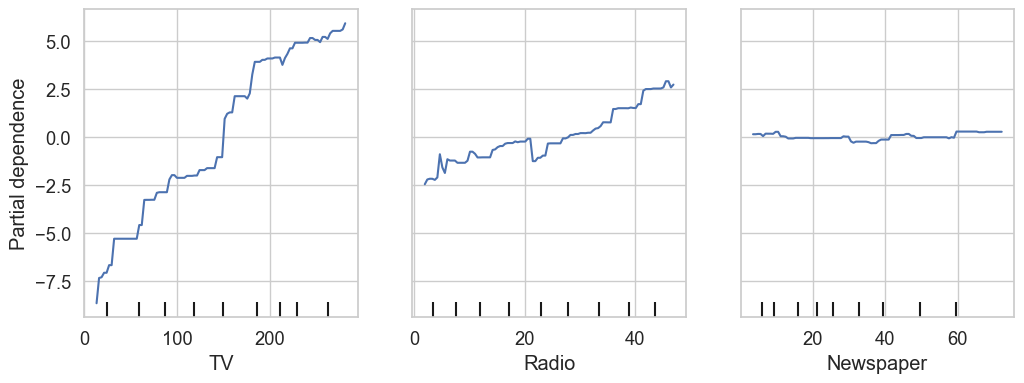

In [31]:
from sklearn.inspection import PartialDependenceDisplay

features = ["TV", "Radio", "Newspaper"]

fig, ax = plt.subplots(figsize=(12,4))
PartialDependenceDisplay.from_estimator(gb_model, X, features, ax=ax)
plt.show()

### **Partial Dependence Insights – Advertising Channels**

- **TV**
  - Shows a strong positive and non-linear relationship with sales.
  - As TV spending increases, sales rise sharply up to a point, then gradually plateau — indicating diminishing returns at very high spend levels.
  - Confirms TV as the primary driver of sales performance.

- **Radio**
  - Displays a moderate positive trend with sales.
  - Impact is consistent but smaller than TV.
  - Suggests that Radio complements TV advertising, improving reach and reinforcement.

- **Newspaper**
  - The plot remains almost flat across all spending levels, implying minimal or no influence on sales.
  - Indicates Newspaper ads are not cost-effective and contribute negligibly to sales variation.

In [33]:
import joblib
joblib.dump(gb_model, "gb_model.pkl")

['gb_model.pkl']

# **Business Insights**

### Determine if Newspaper ads are cost-effective

* The analysis indicates that **Newspaper advertising is not cost-effective**.
* Its regression coefficient (0.0043) is significantly lower than TV (0.0545) and Radio (0.1009), showing that increasing Newspaper spending has a negligible effect on sales.
* Therefore, the company should consider **reducing or reallocating** Newspaper ad budgets toward **Radio or TV**, which demonstrate far stronger returns on investment and sales impact.

### Suggest budget reallocation strategy

The Gradient Boosting model reveals that **TV advertising has the highest relative importance (≈85-90%)**, followed by **Radio (≈15-20%)**, while **Newspaper contributes negligibly** to sales.
Accordingly, the company should **reallocate its advertising budget** to prioritize **TV (≈70%)**, maintain a supportive **Radio presence (≈25%)**, and limit **Newspaper spend (≈5%)**.
This optimization is expected to **maximize ROI, enhance sales predictability**, and **reduce inefficiencies** in advertising expenditure.

### Quantify expected sales uplift with budget changes.

In [40]:
rel_imp = {'TV': 0.85, 'Radio': 0.10, 'Newspaper': 0.02}

df = pd.DataFrame(list(rel_imp.items()), columns=['Channel', 'Relative_Importance'])

# Allocate a total budget proportionally
total_budget = 100000  
df['Allocated_Budget'] = df['Relative_Importance'] * total_budget

# Normalize relative importance 
df['Importance_Normalized'] = df['Relative_Importance'] / df['Relative_Importance'].sum()

# Simulate hypothetical impact score
df['Impact_Score'] = df['Allocated_Budget'] * df['Relative_Importance']

df = df.sort_values(by='Impact_Score', ascending=False).reset_index(drop=True)

pd.set_option('display.float_format', '{:.2f}'.format)
print(df[['Channel', 'Allocated_Budget', 'Relative_Importance', 'Impact_Score']])

scenario = df.copy()
scenario.loc[scenario['Channel'] == 'TV', 'Allocated_Budget'] *= 1.2
scenario.loc[scenario['Channel'] == 'Newspaper', 'Allocated_Budget'] *= 0.5
scenario['Impact_Score'] = scenario['Allocated_Budget'] * scenario['Relative_Importance']

print("\nScenario Simulation:")
print(scenario[['Channel', 'Allocated_Budget', 'Impact_Score']])

     Channel  Allocated_Budget  Relative_Importance  Impact_Score
0         TV          85000.00                 0.85      72250.00
1      Radio          10000.00                 0.10       1000.00
2  Newspaper           2000.00                 0.02         40.00

Scenario Simulation:
     Channel  Allocated_Budget  Impact_Score
0         TV         102000.00      86700.00
1      Radio          10000.00       1000.00
2  Newspaper           1000.00         20.00


#### **1. Initial Allocation (Based on Relative Importance)**:

- TV dominates the expected impact, receiving ₹85,000 of the total ₹100,000 budget, contributing the highest **Impact Score** of 72,250.
- Radio is the second priority, allocated ₹10,000, with a modest Impact Score of 1,000.
- Newspaper has minimal contribution, allocated only ₹2,000, Impact Score 40.

**Insight**: The model indicates that **TV is the primary driver of sales**, followed by Radio, while Newspaper has negligible expected contribution.

#### **2. Scenario Simulation (Adjusted Budget)**:

- **TV budget increased by 20%** → Impact Score rises from 72,250 to 86,700, showing a strong positive effect on expected sales.
- **Newspaper budget reduced by 50%** → Impact Score drops from 40 to 20, confirming its very limited influence.
- **Radio remains unchanged** → Impact Score unchanged at 1,000.

**Insight**: Reallocating budget **towards high-impact channels like TV** significantly increases expected sales, while cutting spend on low-impact channels (Newspaper) has negligible effect.